In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/athleteEvents.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# data pre-processing 

In [6]:
df=df.fillna(0)

## medal 

In [7]:
pd.unique(df['Medal'].values)

array([0, 'Gold', 'Bronze', 'Silver'], dtype=object)

## years

In [45]:
print(pd.unique(df['Year']))
print( "lenght is " , len(pd.unique(df['Year'])))

[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]
lenght is  35


In [46]:
df92=df[df['Year']==1900]
df20=df[df['Year']==2012]

In [47]:
pM = len(df92[df92["Sex"]=='M'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
PF= len(df92[df92["Sex"]=='F'])/(len(df92[df92["Sex"]=='M'])+len(df92[df92["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.9829545454545454  pourcentage of femel 0.017045454545454544


In [48]:
pM = len(df20[df20["Sex"]=='M'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
PF= len(df20[df20["Sex"]=='F'])/(len(df20[df20["Sex"]=='M'])+len(df20[df20["Sex"]=='F']))
print('Pourcentage of man', pM , " pourcentage of femel", PF)

Pourcentage of man 0.5499226006191951  pourcentage of femel 0.45007739938080493


explore the slopgraphe and the percentage to compare the percentage of femel and male participation during the time.
the pourcentage of medal from past to know. I will then explore the same direction for the country with most number of medail and also the country with less number of medail.  
If possible, show the distribution of medal get by both gender in the word map.  To get which country could affect the gender performance in the olympic game.  

<AxesSubplot:xlabel='Sex', ylabel='count'>

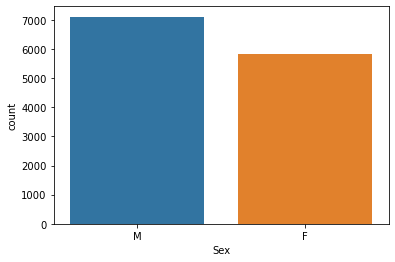

In [23]:
sns.countplot(data=df20, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

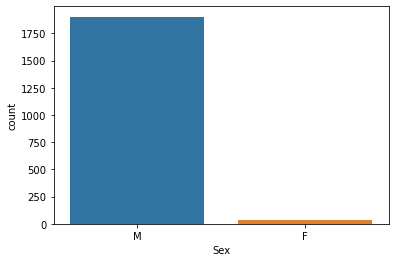

In [24]:
sns.countplot(data=df92, x='Sex')


**count the total number of men and winen who participate to the onlympic and show the number of medal got per gender.**

In [124]:
l =df.groupby(['Sex', 'Year']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count']]

In [128]:
l['Year'] = l['Year'].astype(int)
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sex     69 non-null     object
 1   Year    69 non-null     int64 
 2   count   69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


<AxesSubplot:xlabel='Year', ylabel='count'>

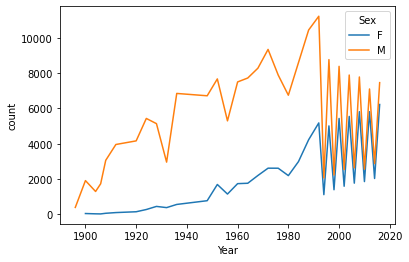

In [130]:
sns.lineplot(data=l, x='Year',y='count',hue='Sex')

In [65]:
l =df.groupby(['Sex', 'Year','Medal']).agg('count').reset_index()
l['count'] = l['ID']
l=l[['Sex','Year','count','Medal']]
l

,Sex,Year,count,Medal
0,F,1900,20,0
1,F,1900,5,Bronze
2,F,1900,4,Gold
3,F,1900,4,Silver
4,F,1904,6,0
...,...,...,...,...
271,M,2014,110,Silver
272,M,2016,6411,0
273,M,2016,372,Bronze
274,M,2016,347,Gold


<AxesSubplot:xlabel='Year', ylabel='count'>

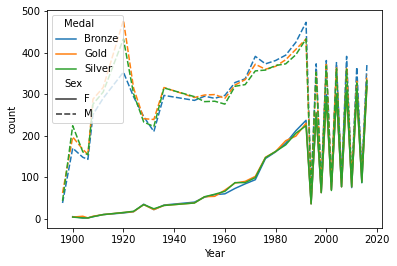

In [152]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex')

In [156]:
l=l[l['Year']>=1990]

<AxesSubplot:xlabel='Year', ylabel='count'>

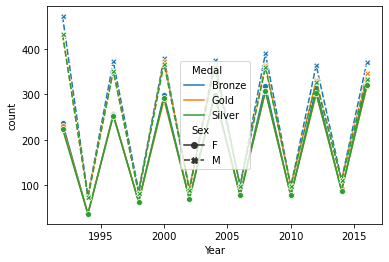

In [159]:
sns.lineplot(data=l, x='Year',y='count',hue='Medal',style='Sex',markers=True)

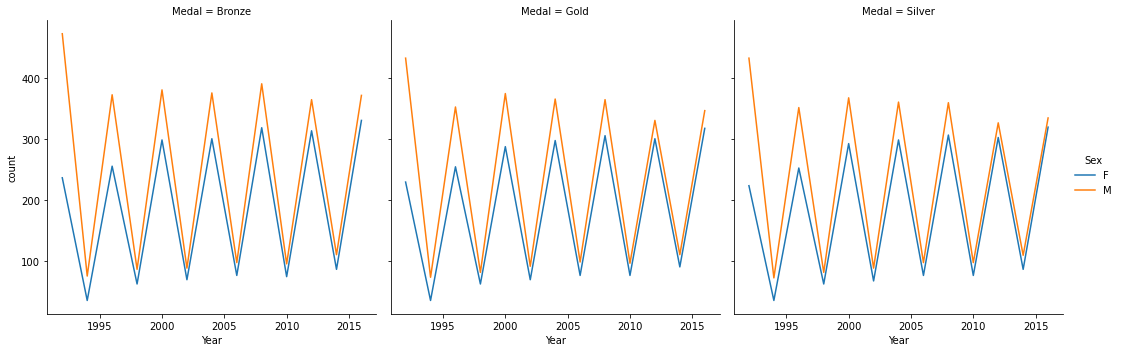

In [165]:
sns.relplot(
    data=l, x="Year", y="count",
    col="Medal", hue="Sex",
    kind="line"
)

# How does age and gender affect olympic sports performance?

# Does location really affect an athlete performance?

# How sport Location Affects athlete Performance?

# How does the athlete with more medal evolve in year?